In [497]:
from openeye import oechem, oedepict, oeomega, oequacpac, oemedchem
from IPython.display import display
import pandas as pd
import oenotebook as oenb
from openmoltools.openeye import get_charges
from openmoltools import openeye
from torsionfit.qmscan.enumfrags2pdf import *

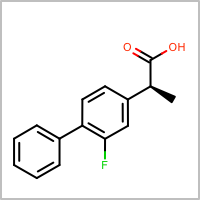

In [2]:
test_simple = 'C[C@@H](c1ccc(c(c1)F)c2ccccc2)C(=O)O'
oenb.draw_smiles(test_simple)

In [3]:
# Charge molecule. This takes some time
mol = oechem.OEGraphMol()
simple_oemol = openeye.smiles_to_oemol(test_simple)
charged = get_charges(simple_oemol, keep_confs=1)

In [4]:
simple_oemol.GetTitle()

'(2~{S})-2-(3-fluoro-4-phenyl-phenyl)propanoic acid'

In [7]:
# Calculate Wiberg bond order. First get all bonds
for bond in charged.GetBonds():
    print(bond.GetOrder(), end= " ")
    print(bond.GetData("WibergBondOrder"))

1 0.9790348410606384
1 0.9409083127975464
1 0.9733465313911438
2 1.4091099500656128
1 1.385242223739624
2 1.4288681745529175
1 1.3877619504928589
2 1.3378217220306396
1 1.3656305074691772
1 1.0218538045883179
1 0.9945589900016785
2 1.3885419368743896
1 1.386399507522583
2 1.4249420166015625
1 1.4112540483474731
2 1.4153481721878052
1 1.4218850135803223
1 0.9123947620391846
2 1.8066850900650024
1 1.043837070465088
1 0.9746313691139221
1 0.97335284948349
1 0.9708201885223389
1 0.9463828206062317
1 0.945492684841156
1 0.944377601146698
1 0.9471958875656128
1 0.9485974907875061
1 0.9498156905174255
1 0.9491798281669617
1 0.9483686685562134
1 0.9093071222305298


In [9]:
def MyGetExplicitDegree(atom):
    result = 0
    for bond in atom.GetBonds():
        result += 1
    return result

In [10]:
for atom in charged.GetAtoms():
    print("Atom", atom.GetIdx(), "has degree", MyGetExplicitDegree(atom), atom.GetName())

Atom 0 has degree 4 C1
Atom 1 has degree 4 C2
Atom 2 has degree 1 H1
Atom 3 has degree 3 C3
Atom 4 has degree 3 C4
Atom 5 has degree 3 C5
Atom 6 has degree 3 C6
Atom 7 has degree 3 C7
Atom 8 has degree 3 C8
Atom 9 has degree 1 F1
Atom 10 has degree 3 C9
Atom 11 has degree 3 C10
Atom 12 has degree 3 C11
Atom 13 has degree 3 C12
Atom 14 has degree 3 C13
Atom 15 has degree 3 C14
Atom 16 has degree 3 C15
Atom 17 has degree 1 O1
Atom 18 has degree 2 O2
Atom 19 has degree 1 H2
Atom 20 has degree 1 H3
Atom 21 has degree 1 H4
Atom 22 has degree 1 H5
Atom 23 has degree 1 H6
Atom 24 has degree 1 H7
Atom 25 has degree 1 H8
Atom 26 has degree 1 H9
Atom 27 has degree 1 H10
Atom 28 has degree 1 H11
Atom 29 has degree 1 H12
Atom 30 has degree 1 H13


In [11]:
for atom in charged.GetAtoms():
    print ("Atom:", atom.GetName(), end=" ")
    print (atom.GetIdx(), end=" ")

    print ("Neighbors:", end=" ")
    for bond in atom.GetBonds():
        nbor = bond.GetNbr(atom)
        print (nbor.GetIdx(), nbor.GetName(), end=" ")

    print ()

Atom: C1 0 Neighbors: 1 C2 19 H2 20 H3 21 H4 
Atom: C2 1 Neighbors: 0 C1 2 H1 3 C3 16 C15 
Atom: H1 2 Neighbors: 1 C2 
Atom: C3 3 Neighbors: 1 C2 8 C8 4 C4 
Atom: C4 4 Neighbors: 3 C3 5 C5 22 H5 
Atom: C5 5 Neighbors: 4 C4 6 C6 23 H6 
Atom: C6 6 Neighbors: 5 C5 7 C7 10 C9 
Atom: C7 7 Neighbors: 6 C6 8 C8 9 F1 
Atom: C8 8 Neighbors: 7 C7 3 C3 24 H7 
Atom: F1 9 Neighbors: 7 C7 
Atom: C9 10 Neighbors: 6 C6 15 C14 11 C10 
Atom: C10 11 Neighbors: 10 C9 12 C11 25 H8 
Atom: C11 12 Neighbors: 11 C10 13 C12 26 H9 
Atom: C12 13 Neighbors: 12 C11 14 C13 27 H10 
Atom: C13 14 Neighbors: 13 C12 15 C14 28 H11 
Atom: C14 15 Neighbors: 14 C13 10 C9 29 H12 
Atom: C15 16 Neighbors: 1 C2 17 O1 18 O2 
Atom: O1 17 Neighbors: 16 C15 
Atom: O2 18 Neighbors: 16 C15 30 H13 
Atom: H2 19 Neighbors: 0 C1 
Atom: H3 20 Neighbors: 0 C1 
Atom: H4 21 Neighbors: 0 C1 
Atom: H5 22 Neighbors: 4 C4 
Atom: H6 23 Neighbors: 5 C5 
Atom: H7 24 Neighbors: 8 C8 
Atom: H8 25 Neighbors: 11 C10 
Atom: H9 26 Neighbors: 12 C11 
Atom:

In [37]:
for atom in charges.GetAtoms():
    print ("Atom:", atom.GetName(), end=" ")
    print (atom.GetIdx(), end=" ")

    print ("Neighbors:", end=" ")
    for nbor in atom.GetAtoms():
        print (nbor.GetIdx(), nbor.GetName(), end=" ")

    print ()

Atom: C1 0 Neighbors: 36 C29 1 C2 37 H1 
Atom: C2 1 Neighbors: 0 C1 2 C3 8 N2 
Atom: C3 2 Neighbors: 1 C2 7 C7 3 C4 
Atom: C4 3 Neighbors: 2 C3 4 N1 38 H2 
Atom: N1 4 Neighbors: 3 C4 5 C5 
Atom: C5 5 Neighbors: 4 N1 6 C6 39 H3 
Atom: C6 6 Neighbors: 5 C5 7 C7 40 H4 
Atom: C7 7 Neighbors: 6 C6 2 C3 41 H5 
Atom: N2 8 Neighbors: 1 C2 9 C8 
Atom: C8 9 Neighbors: 8 N2 10 N3 35 N7 
Atom: N3 10 Neighbors: 9 C8 11 C9 42 H6 
Atom: C9 11 Neighbors: 10 N3 16 C14 12 C10 
Atom: C10 12 Neighbors: 11 C9 13 C11 34 C28 
Atom: C11 13 Neighbors: 12 C10 14 C12 43 H7 
Atom: C12 14 Neighbors: 13 C11 15 C13 44 H8 
Atom: C13 15 Neighbors: 14 C12 16 C14 17 N4 
Atom: C14 16 Neighbors: 15 C13 11 C9 45 H9 
Atom: N4 17 Neighbors: 15 C13 18 C15 46 H10 
Atom: C15 18 Neighbors: 17 N4 19 C16 33 O1 
Atom: C16 19 Neighbors: 18 C15 24 C21 20 C17 
Atom: C17 20 Neighbors: 19 C16 21 C18 47 H11 
Atom: C18 21 Neighbors: 20 C17 22 C19 48 H12 
Atom: C19 22 Neighbors: 21 C18 23 C20 25 C22 
Atom: C20 23 Neighbors: 22 C19 24 C21 4

In [493]:
# TODO: Leave out hydrogens, halogens (what else?, should we remove halogens? or always keep it on?)
# Next step: Figure out how to extract fragments as OEAtomBondSet. Seems like it should be a recursive algorithm. 
# Split until you can't split anymore. Should end up with 5 fragments in this example.
fragments = []
print ("Rotatable bonds:")
for bond in charged.GetBonds():
    if bond.GetData('WibergBondOrder') < 1.2:       
        beg = bond.GetBgn()
        end = bond.GetEnd()       
        if (not end.IsHydrogen()) and (not beg.IsHydrogen()) and (not end.IsHalogen()) and (not beg.IsHalogen()):
            #beg_name = beg.GetName()
            #if beg_name in fragments:
            #    print('overwriting {}'.format(beg_name))
            beg_set =  oechem.OEAtomBondSet()
            beg_set.AddAtom(beg)
            end_set = oechem.OEAtomBondSet()
            end_set.AddAtom(end)
            # Build fragment from beg of bond
            build_fragment(charged, beg, end, beg_set)
            # Build fragment from end of bond
            build_fragment(charged, end, beg, end_set)
            fragments.append(beg_set)
            fragments.append(end_set)
            
            print(beg.GetName(), end=" ")
            print(end.GetName(), end = " ")
            print(bond.GetData('WibergBondOrder'), bond.GetOrder())
        
#           for neighbor in beg.GetAtoms():
#                
#                if neighbor != end:
#                    print(neighbor.GetName(), end=' ')
#                    if neighbor.GetDegree() == 1:
 #                       print(neighbor.GetDegree())
#                        fragments[beg.GetName()].append(neighbor.GetName())
#                    if neighbor.GetDegree() != 1:
#                        fragments[beg.GetName()].append(neighbor.GetName())
#                        print(neighbor.GetDegree(), end=' ')
#                        for next_nbr in neighbor.GetAtoms():
#                            fragments[beg.GetName()].append(next_nbr.GetName())
#                            print(next_nbr.GetName())
                   
                    
                
            


Rotatable bonds:
C1 C2 0.9790348410606384 1
C2 C3 0.9733465313911438 1
C6 C9 0.9945589900016785 1
C2 C15 0.9123947620391846 1
C15 O2 1.043837070465088 1


In [496]:
fragments

[<oechem.OEAtomBondSet; proxy of <Swig Object of type 'OEChem::OEAtomBondSet *' at 0x11dd19990> >,
 <oechem.OEAtomBondSet; proxy of <Swig Object of type 'OEChem::OEAtomBondSet *' at 0x11dd19ed0> >,
 <oechem.OEAtomBondSet; proxy of <Swig Object of type 'OEChem::OEAtomBondSet *' at 0x11dd65750> >,
 <oechem.OEAtomBondSet; proxy of <Swig Object of type 'OEChem::OEAtomBondSet *' at 0x11d3eba20> >,
 <oechem.OEAtomBondSet; proxy of <Swig Object of type 'OEChem::OEAtomBondSet *' at 0x11d3ebcc0> >,
 <oechem.OEAtomBondSet; proxy of <Swig Object of type 'OEChem::OEAtomBondSet *' at 0x11d3ebde0> >,
 <oechem.OEAtomBondSet; proxy of <Swig Object of type 'OEChem::OEAtomBondSet *' at 0x11dd191b0> >,
 <oechem.OEAtomBondSet; proxy of <Swig Object of type 'OEChem::OEAtomBondSet *' at 0x11df06960> >,
 <oechem.OEAtomBondSet; proxy of <Swig Object of type 'OEChem::OEAtomBondSet *' at 0x11d3eb150> >,
 <oechem.OEAtomBondSet; proxy of <Swig Object of type 'OEChem::OEAtomBondSet *' at 0x11d3f8c60> >]

In [37]:
print ("Rotatable bonds:")
for bond in charged.GetBonds():
    if bond.IsRotor():
        beg = bond.GetBgn()
        end = bond.GetEnd()       
        
        print(beg.GetName(), end=" ")
        print(end.GetName(), end = " ")
        print(bond.GetData('WibergBondOrder'), bond.GetOrder())

        for neighbor in beg.GetAtoms():

                print(neighbor.GetName())


Rotatable bonds:
C2 C3 0.9733465313911438 1
C1
H1
C3
C15
C6 C9 0.9945589900016785 1
C5
C7
C9
C2 C15 0.9123947620391846 1
C1
H1
C3
C15


In [71]:
for frag in frags:
    print(type(frag))

<class 'oechem.OEAtomBondSet'>
<class 'oechem.OEAtomBondSet'>
<class 'oechem.OEAtomBondSet'>
<class 'oechem.OEAtomBondSet'>
<class 'oechem.OEAtomBondSet'>
<class 'oechem.OEAtomBondSet'>
<class 'oechem.OEAtomBondSet'>
<class 'oechem.OEAtomBondSet'>
<class 'oechem.OEAtomBondSet'>
<class 'oechem.OEAtomBondSet'>
<class 'oechem.OEAtomBondSet'>


In [67]:
frag.

<oechem.OEAtomBondSet; proxy of <Swig Object of type 'OEChem::OEAtomBondSet *' at 0x119afdc90> >

In [72]:
oechem.OEAtomBondSet

In [73]:
test = oechem.OEAtomBondSet()

In [74]:
test

<oechem.OEAtomBondSet; proxy of <Swig Object of type 'OEChem::OEAtomBondSet *' at 0x119b0bd50> >

In [42]:
neighbor.GetDegree()

2

In [476]:
def build_fragment(mol, beg, end, frag, seen = []):
    seen.append(beg.GetName())
    beg_idx = beg.GetIdx()
    for nbr in beg.GetAtoms():
        nbr_idx = nbr.GetIdx()
        if (nbr_idx != end.GetIdx()): 
            if nbr.GetDegree() == 1:
                frag.AddAtom(nbr)
                bond = mol.GetBond(nbr, beg)
                if bond is None:
                    new_nbr = [atom for atom in nbr.GetAtoms()][0]
                    bond = mol.GetBond(nbr, new_nbr)
                frag.AddBond(bond)                           
            elif nbr_idx != beg_idx:
                frag.AddAtom(nbr)
                bond = mol.GetBond(beg, nbr)
                frag.AddBond(bond)
                if nbr.GetName() not in seen:
                    beg = nbr 
                    build_fragment(mol, beg, end, frag, seen)
    #return(frag)

        

In [461]:
for bond in beg.GetBonds():
    nbr = bond.GetNbr(beg)
    nbr_idx = nbr.GetIdx()
    beg_idx = beg.GetIdx()
    if nbr_idx > beg_idx and nbr_idx != end.GetIdx():
        print(nbr.GetName())
        print(bond.GetData())

H2
{'WibergBondOrder': 0.9746313691139221}
H3
{'WibergBondOrder': 0.97335284948349}
H4
{'WibergBondOrder': 0.9708201885223389}


In [462]:
beg = bonds[0].GetBgn()
end = bonds[0].GetEnd()
print(bonds[0].GetBgn().GetName())
print(bonds[0].GetEnd().GetName())

C1
C2


In [477]:
test_beg = oechem.OEAtomBondSet()
test_beg.AddAtom(beg)
build_fragment(charged, beg, end, test_beg)

In [478]:
for atom in test.GetAtoms():
    print('Atom: {}'.format(atom.GetName()))
    for bond in atom.GetBonds():
        nbr = bond.GetNbr(atom)
        print(nbr.GetName())


Atom: C1
C2
H2
H3
H4
Atom: H2
C1
Atom: H3
C1
Atom: H4
C1


In [479]:
for bond in test.GetBonds():
    print(bond.GetData())

{'WibergBondOrder': 0.9746313691139221}
{'WibergBondOrder': 0.97335284948349}
{'WibergBondOrder': 0.9708201885223389}


In [480]:
test_end = oechem.OEAtomBondSet()
test_end.AddAtom(end)
build_fragment(charged, end, beg, seen=[], frag=test_end)

In [481]:
for atom in test_end.GetAtoms():
    print('Atom: {}'.format(atom.GetName()))
    for bond in atom.GetBonds():
        nbr = bond.GetNbr(atom)
        print(nbr.GetName())


Atom: C2
C1
H1
C3
C15
Atom: H1
C2
Atom: C3
C2
C8
C4
Atom: C8
C7
C3
H7
Atom: C7
C6
C8
F1
Atom: C6
C5
C7
C9
Atom: C5
C4
C6
H6
Atom: C4
C3
C5
H5
Atom: H5
C4
Atom: H6
C5
Atom: C9
C6
C14
C10
Atom: C14
C13
C9
H12
Atom: C13
C12
C14
H11
Atom: C12
C11
C13
H10
Atom: C11
C10
C12
H9
Atom: C10
C9
C11
H8
Atom: H8
C10
Atom: H9
C11
Atom: H10
C12
Atom: H11
C13
Atom: H12
C14
Atom: F1
C7
Atom: H7
C8
Atom: C15
C2
O1
O2
Atom: O1
C15
Atom: O2
C15
H13
Atom: H13
O2


In [482]:
for bond in test_end.GetBonds():
    print(bond.GetData())

{'WibergBondOrder': 0.9409083127975464}
{'WibergBondOrder': 0.9733465313911438}
{'WibergBondOrder': 1.4091099500656128}
{'WibergBondOrder': 1.3656305074691772}
{'WibergBondOrder': 1.3378217220306396}
{'WibergBondOrder': 1.3877619504928589}
{'WibergBondOrder': 1.4288681745529175}
{'WibergBondOrder': 1.385242223739624}
{'WibergBondOrder': 0.9463828206062317}
{'WibergBondOrder': 0.945492684841156}
{'WibergBondOrder': 0.9945589900016785}
{'WibergBondOrder': 1.3885419368743896}
{'WibergBondOrder': 1.4218850135803223}
{'WibergBondOrder': 1.4153481721878052}
{'WibergBondOrder': 1.4112540483474731}
{'WibergBondOrder': 1.4249420166015625}
{'WibergBondOrder': 1.386399507522583}
{'WibergBondOrder': 0.9471958875656128}
{'WibergBondOrder': 0.9485974907875061}
{'WibergBondOrder': 0.9498156905174255}
{'WibergBondOrder': 0.9491798281669617}
{'WibergBondOrder': 0.9483686685562134}
{'WibergBondOrder': 1.0218538045883179}
{'WibergBondOrder': 0.944377601146698}
{'WibergBondOrder': 0.9123947620391846}
{'Wi

In [483]:
# find bond with certain atom indices
len([bond for bond in charged.GetBonds()])

32

In [470]:
32-4

28

In [484]:
len([bond for bond in test_end.GetBonds()])

28

In [485]:
len([atom for atom in charged.GetAtoms()])

31

In [486]:
len([atom for atom in test_end.GetAtoms()])

27

In [487]:
for bond in test_end.GetBonds():
    print('Bond Index: {}'.format(bond.GetIdx()))
    print(bond.GetBgn().GetName())
    print(bond.GetEnd().GetName())

Bond Index: 1
C2
H1
Bond Index: 2
C2
C3
Bond Index: 3
C3
C8
Bond Index: 8
C7
C8
Bond Index: 7
C6
C7
Bond Index: 6
C5
C6
Bond Index: 5
C4
C5
Bond Index: 4
C3
C4
Bond Index: 23
C4
H5
Bond Index: 24
C5
H6
Bond Index: 10
C6
C9
Bond Index: 11
C9
C14
Bond Index: 16
C13
C14
Bond Index: 15
C12
C13
Bond Index: 14
C11
C12
Bond Index: 13
C10
C11
Bond Index: 12
C9
C10
Bond Index: 26
C10
H8
Bond Index: 27
C11
H9
Bond Index: 28
C12
H10
Bond Index: 29
C13
H11
Bond Index: 30
C14
H12
Bond Index: 9
C7
F1
Bond Index: 25
C8
H7
Bond Index: 17
C2
C15
Bond Index: 18
C15
O1
Bond Index: 19
C15
O2
Bond Index: 31
O2
H13
